# League of Legends dataset exploration

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

We have identified four important features in our dataset needed in order to test our hypothesis. These features have been extracted from the jason dataset with a python script into sepeparate csv files. In order to get a better sense of the data and for easier handeling we need to ceate a new dataframe that incorporates all the extracted features.

In [4]:
# making a dataframe with features for the 'jungle' role
jungle = pd.read_csv("data/features_Jungle.csv", delimiter= ' ', header=None, names=["CS", "Gold", "XP", "Dmg", "gameResult"])
jungle['role'] = 'jungle'
teamID = pd.Series(np.arange(1586))
jungle['team'] = teamID

In [5]:
# making a dataframe with features for the 'top' role
top = pd.read_csv("data/features_Top.csv", delimiter= ' ', header=None, names=["CS", "Gold", "XP", "Dmg", "gameResult"])
top['role'] = 'top'
teamID = pd.Series(np.arange(1586))
top['team'] = teamID

In [6]:
# making a dataframe with features for the 'mid' role
mid = pd.read_csv("data/features_Mid.csv", delimiter= ' ', header=None, names=["CS", "Gold", "XP", "Dmg", "gameResult"])
mid['role'] = 'mid'
teamID = pd.Series(np.arange(1586))
mid['team'] = teamID

In [7]:
# making a dataframe with features for the 'support' role
support = pd.read_csv("data/features_Support.csv", delimiter= ' ', header=None, names=["CS", "Gold", "XP", "Dmg", "gameResult"])
support['role'] = 'support'
teamID = pd.Series(np.arange(1586))
support['team'] = teamID

In [8]:
# making a dataframe with features for the 'carry' role
carry = pd.read_csv("data/features_Carry.csv", delimiter= ' ', header=None, names=["CS", "Gold", "XP", "Dmg", "gameResult"])
carry["role"] = "carry"
teamID = pd.Series(np.arange(1586))
carry["team"] = teamID

In [9]:
# combining all role dataframes into a new dataframe 
df = pd.concat([jungle, top, mid, support, carry])
df["role"] = df["role"].astype("category")
df["team"] = df["team"].astype("category")
df.head()

,CS,Gold,XP,Dmg,gameResult,role,team
0,1.1,286.9,329.1,545.7,Win,jungle,0
1,0.4,266.2,312.5,645.0,Fail,jungle,1
2,0.5,290.9,320.2,682.0,Fail,jungle,2
3,0.7,247.0,302.0,493.8,Win,jungle,3
4,0.5,276.8,368.8,493.1,Fail,jungle,4


Simple exploration of the various features in relationship to the roles

In [10]:
df.groupby('role').agg({'CS': ['std', 'mean']})

CS          
              std      mean
role                       
carry    1.166292  5.906305
jungle   0.400713  0.357125
mid      1.271900  5.766709
support  0.519615  0.600820
top      1.296444  5.438462

In [11]:
df.groupby("role").agg({"Gold": ['std', 'mean']})

Gold            
               std        mean
role                          
carry    46.485256  259.692749
jungle   43.604132  259.631589
mid      45.059200  257.700504
support  33.119165  179.865637
top      46.138819  249.624212

In [12]:
# splitting the dataframe into two new dfs for winning and losing data
df_win = df[df["gameResult"] == "Win"]
df_fail = df[df["gameResult"] == "Fail"]

Visual exploration of the relationship between the various features and roles in realtion to winning and losing the game.

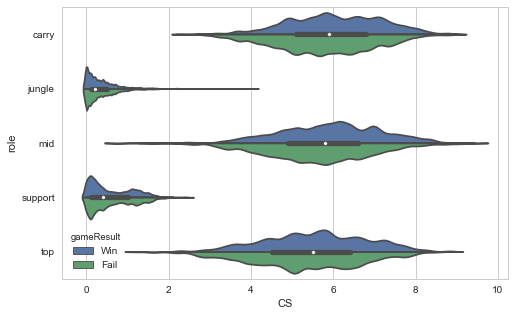

In [40]:
plt.figure(figsize=(8,5))
sns.violinplot(x="CS", y="role", bw=.1, scale="count", hue="gameResult", data=df, split=True);

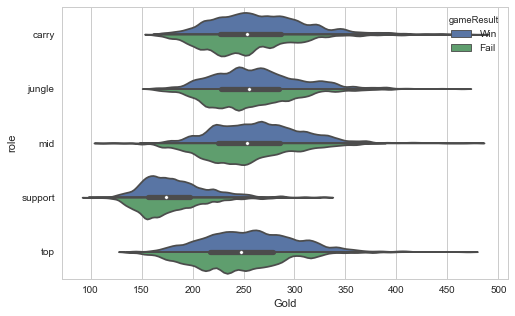

In [41]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Gold", y="role", bw=.1, scale="count", hue="gameResult", data=df, split=True);

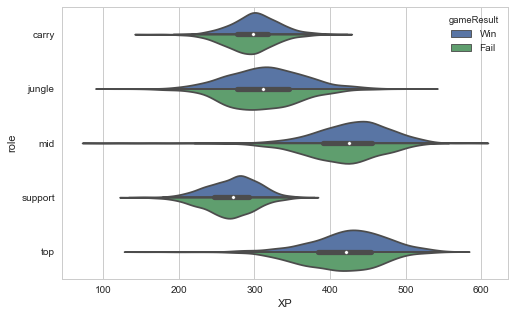

In [28]:
plt.figure(figsize=(8,5))
sns.violinplot(x="XP", y="role", hue="gameResult", data=df, split=True);

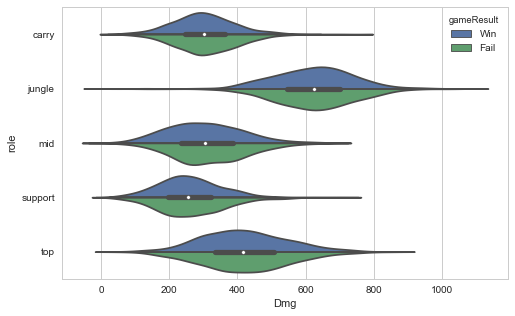

In [29]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Dmg", y="role", hue="gameResult", data=df, split=True);

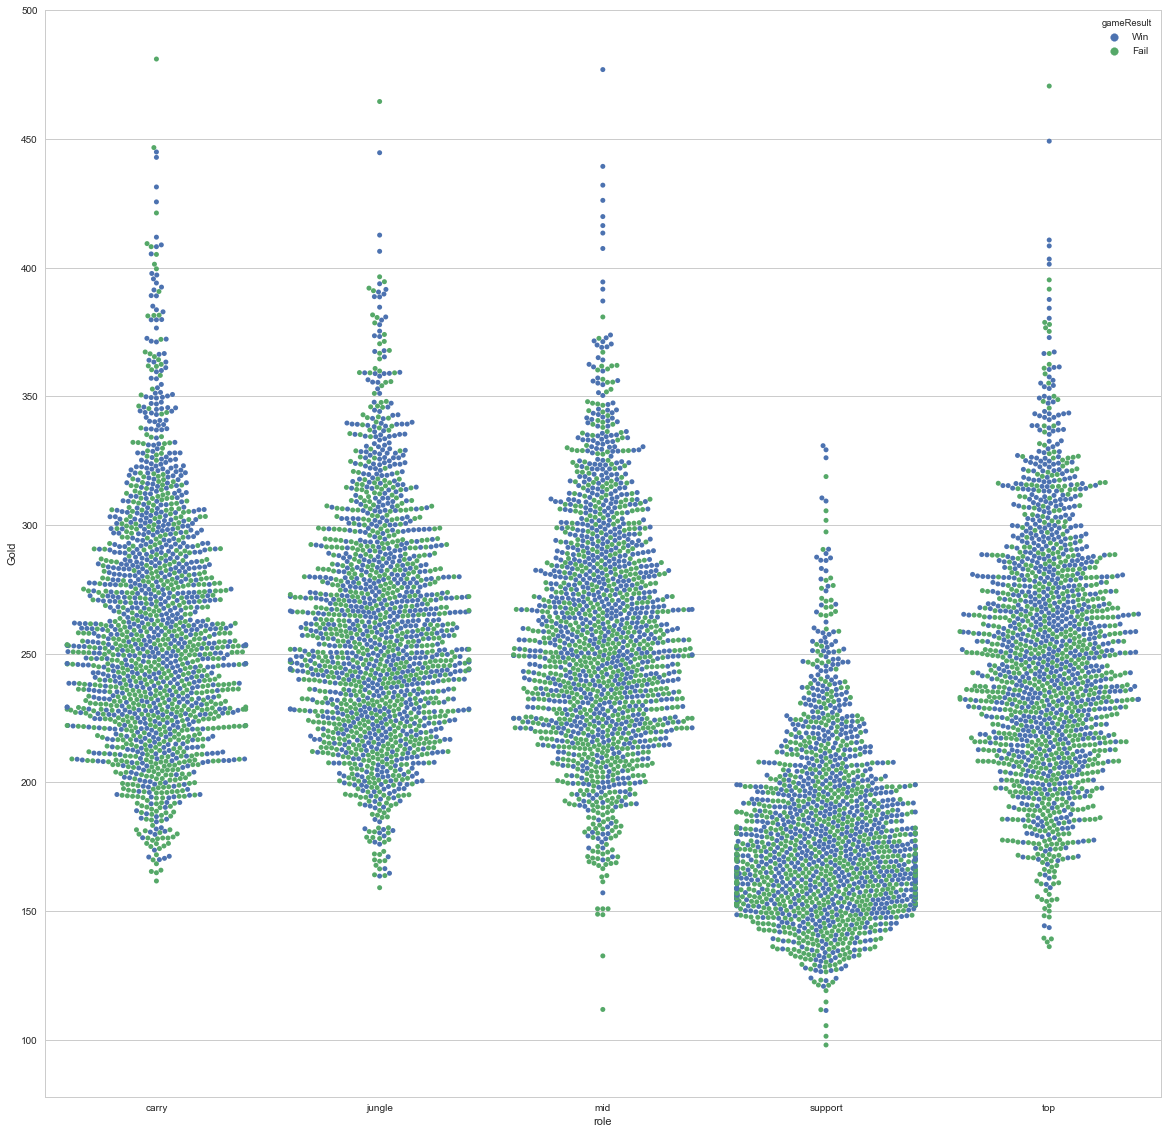

In [36]:
plt.figure(figsize=(20,20))
sns.swarmplot(x="role", y="Gold", hue="gameResult", data=df) 

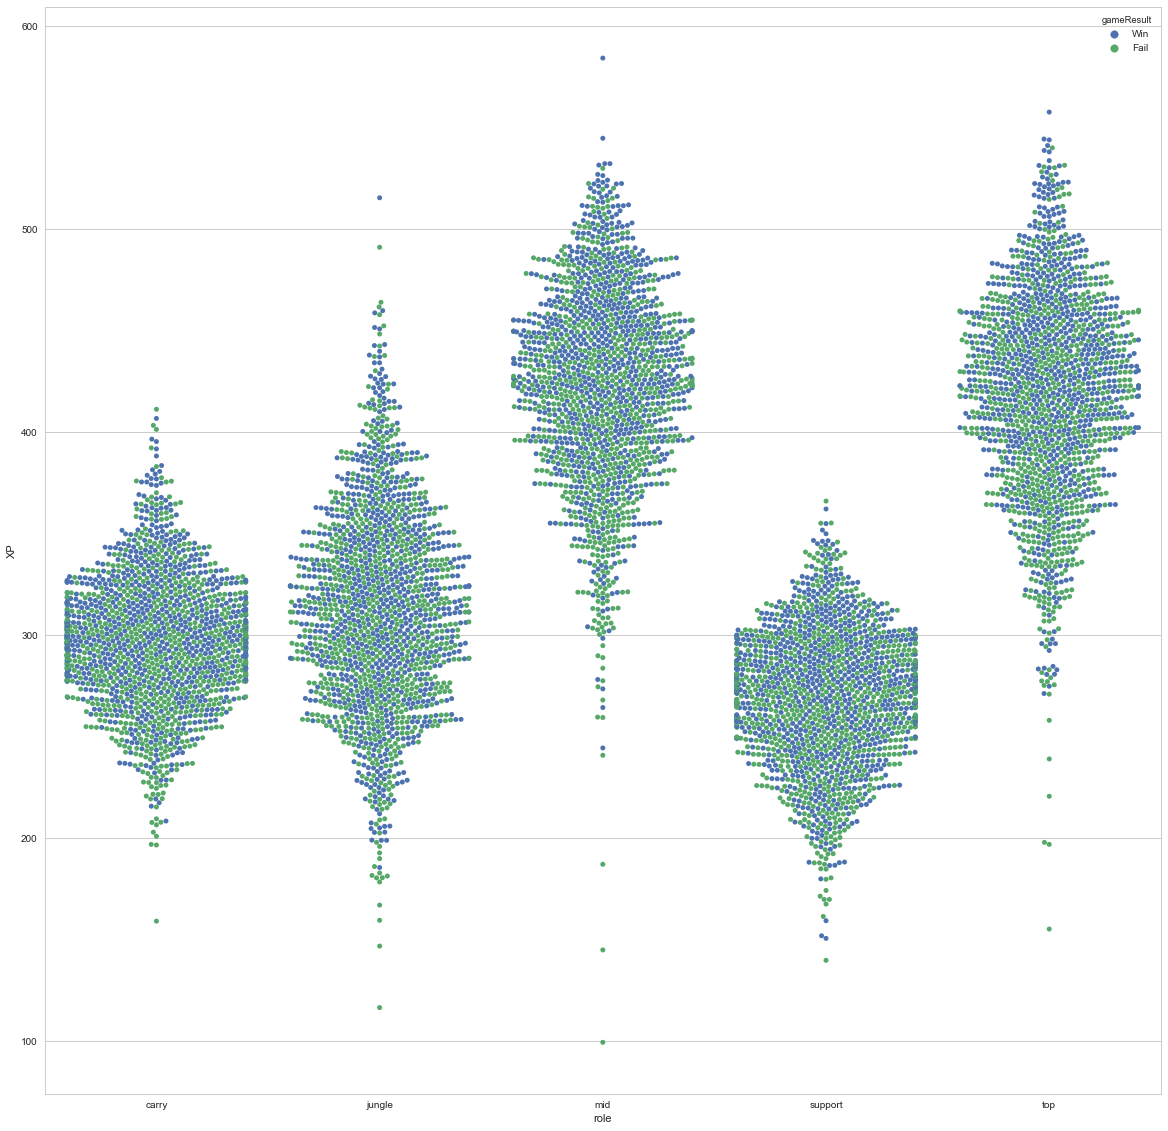

In [37]:
plt.figure(figsize=(20,20))
sns.swarmplot(x="role", y="XP", hue="gameResult", data=df)

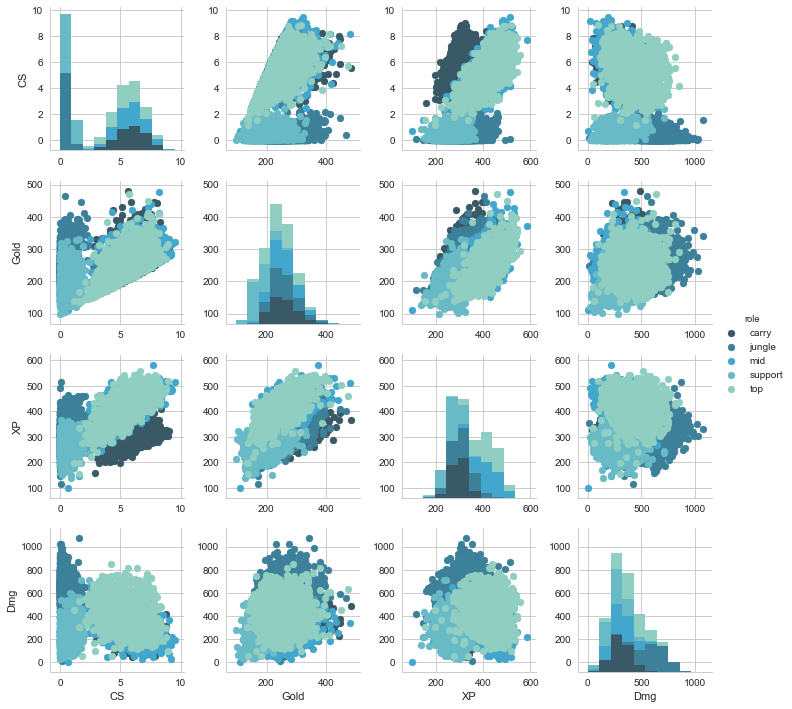

In [16]:
g = sns.PairGrid(df, hue="role", palette="GnBu_d", vars=["CS", "Gold", "XP", "Dmg"])
#g.map(plt.scatter, edgecolor="white")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [19]:
wideframe = df.pivot("team", "role")
wideframe.head()

CS                            Gold                               ...   \
role carry jungle  mid support  top  carry jungle    mid support    top  ...    
team                                                                     ...    
1      5.1    1.1  5.9     0.1  5.7  194.0  286.9  259.5   139.3  287.9  ...    
2      6.7    0.4  6.0     0.1  3.6  316.9  266.2  253.9   231.3  208.2  ...    
3      5.9    0.5  6.5     0.4  5.0  320.2  290.9  283.3   245.9  248.1  ...    
4      4.6    0.7  4.6     0.8  6.1  222.2  247.0  211.8   147.5  262.8  ...    
5      5.5    0.5  6.9     0.6  6.1  206.9  276.8  235.5   153.1  264.0  ...    

        Dmg                              gameResult                             
role  carry jungle    mid support    top      carry jungle   mid support   top  
team                                                                            
1     341.2  545.7  305.3   317.2  727.8        Win    Win   Win     Win   Win  
2     276.8  645.0  333.4   346.4  421.5       Fail   Fail  Fail    Fail  Fail  
3     327.3  682.0  244.2   289.3  327.3       Fail   Fail  Fail    Fail  Fail  
4     266.1  493.8  356.4   290.5  371.0        Win    Win   Win     Win   Win  
5     215.7  493.1  211.2   220.6  195.3       Fail   Fail  Fail    Fail  Fail  

[5 rows x 25 columns]

In [14]:
teamCS_win = df_win.groupby("team").agg({"CS": ['sum', 'std', 'mean']})
teamCS.head()

CS                
       sum       std  mean
team                      
0     17.9  2.758985  3.58
1     16.8  3.064800  3.36
2     18.3  2.978758  3.66
3     16.8  2.460285  3.36
4     19.6  3.116408  3.92